# Health and Sport Data Analysis

### Introduction
This project explores a rich dataset provided by a Professor, acting as my client, who began tracking his exercise activities during the summer of 2019. The dataset includes detailed metrics collected from various devices such as heart rate monitors, watches, and bicycles, and was shared via the social platform [Strava](https://www.strava.com/). The goal of this analysis is to uncover meaningful insights about his exercise patterns and provide a compelling narrative supported by visualizations.

Through this exploration, we aim to answer key questions about activity trends, physiological metrics, and performance differences across activities like running and cycling. The final deliverable includes a dashboard that visually communicates these findings, helping Professor better understand his data and make informed decisions about his fitness journey.

### Adherence to Rule et al.’s Ten Rules for Computational Narratives

Rule 1: Tell a story for an audience

Evidence: The notebook is structured as a narrative with sections like Introduction, Key Findings, and Key Insights, guiding the reader through the analysis.

Rule 2: Document the process, not just the results

Evidence: Sections like Load, Clean, and Manipulate Data explicitly describe steps (e.g., handling null values, activity separation) rather than just presenting outputs.

Rule 3: Use cell divisions to make steps clear

Evidence: This notebook shows logical divisions (e.g., Density Curves, Heatmaps, Map Tracking), suggesting clear segmentation of analysis phases.

Rule 4: Modularize code

Evidence: Tasks are grouped thematically (e.g., data cleaning, visualization types), implying reusable functions or code blocks.

Rule 8: Share and explain your data

Evidence: The Summary section and Key Findings notes indicate data transparency and interpretation.

Rule 9: Design notebooks to be read, run, and explored

Evidence: The inclusion of a Dashboard of All Plots and Map Tracking suggests interactive or exploratory elements.

## Load, Clean, and Manipulate Data  

In [1]:
# Import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from matplotlib.gridspec import GridSpec

In [2]:
# configure this notebook to show plots inline
%matplotlib inline

In [3]:
# Load in dataset
df = pd.read_csv('strava.csv')
df.head()

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,...,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp,unknown_87,unknown_88,unknown_90
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,0.000,0.0,68.0,NaN,NaN,0.0,2019-07-08 21:04:03,0.0,300.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,0.000,0.0,68.0,NaN,NaN,0.0,2019-07-08 21:04:04,0.0,300.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,activities/2675855419.fit.gz,...,1.316,0.0,71.0,NaN,NaN,1316.0,2019-07-08 21:04:07,0.0,300.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3747.0,77.0,activities/2675855419.fit.gz,...,1.866,0.0,77.0,504432050.0,-999063637.0,1866.0,2019-07-08 21:04:14,0.0,100.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3798.0,77.0,activities/2675855419.fit.gz,...,1.894,0.0,80.0,504432492.0,-999064534.0,1894.0,2019-07-08 21:04:15,0.0,100.0,NaN


### Handle Null Values in First 7 Columns

In [4]:
# I see a lot of NaN from above, check how many are there as well as shape of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40649 entries, 0 to 40648
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Air Power             17842 non-null  float64
 1   Cadence               17847 non-null  float64
 2   Form Power            17842 non-null  float64
 3   Ground Time           17847 non-null  float64
 4   Leg Spring Stiffness  17842 non-null  float64
 5   Power                 17847 non-null  float64
 6   Vertical Oscillation  17847 non-null  float64
 7   altitude              14905 non-null  float64
 8   cadence               40627 non-null  float64
 9   datafile              40649 non-null  object 
 10  distance              40649 non-null  float64
 11  enhanced_altitude     40598 non-null  float64
 12  enhanced_speed        40639 non-null  float64
 13  fractional_cadence    40627 non-null  float64
 14  heart_rate            38355 non-null  float64
 15  position_lat       

In [5]:
# take a quick look of summary stats, check for mean, median, min/max, and potential outliers
df.describe()

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,unknown_87,unknown_88,unknown_90
count,17842.000000,17847.000000,17842.000000,17847.000000,17842.000000,17847.000000,17847.000000,14905.000000,40627.000000,40649.000000,40598.000000,40639.000000,40627.000000,38355.000000,4.045700e+04,4.045700e+04,14928.000000,40627.0,38355.000000,18618.000000
mean,1.872100,77.726565,99.485932,325.934107,13.138571,301.459797,6.458074,3846.184368,72.781254,4097.140051,271.346027,3.037084,0.070138,134.680094,5.045408e+08,-9.995175e+08,2067.483856,0.0,298.513883,-1.067354
std,2.777476,9.202077,13.866222,71.773687,2.039567,48.540552,1.135497,134.262498,17.743728,5827.964663,25.035768,1.959805,0.173639,18.713782,1.690905e+05,1.376341e+06,527.173476,0.0,17.176218,2.820492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3555.000000,0.000000,0.000000,209.000000,0.000000,0.000000,56.000000,5.039868e+08,-1.005696e+09,0.000000,0.0,100.000000,-13.000000
25%,1.000000,78.000000,97.000000,308.000000,13.000000,283.000000,6.125000,3768.000000,74.000000,1117.970000,252.800000,2.109000,0.000000,121.000000,5.044397e+08,-9.993986e+08,1782.000000,0.0,300.000000,-3.000000
50%,1.000000,79.000000,101.000000,326.000000,13.375000,303.000000,6.500000,3829.000000,78.000000,2430.500000,269.200000,2.445000,0.000000,136.000000,5.045116e+08,-9.992608e+08,2071.000000,0.0,300.000000,0.000000
75%,2.000000,80.000000,105.000000,340.000000,13.750000,326.000000,7.000000,3912.000000,80.000000,4403.730000,291.200000,2.809000,0.000000,148.000000,5.046159e+08,-9.990579e+08,2370.000000,0.0,300.000000,0.000000
max,48.000000,88.000000,125.000000,1732.000000,16.875000,462.000000,12.500000,5043.000000,118.000000,39007.120000,508.600000,15.349000,0.500000,183.000000,5.089272e+08,-9.921938e+08,7744.000000,0.0,300.000000,6.000000


In [6]:
# bring in all column names and do some research on what they mean
df.columns

Index(['Air Power', 'Cadence', 'Form Power', 'Ground Time',
       'Leg Spring Stiffness', 'Power', 'Vertical Oscillation', 'altitude',
       'cadence', 'datafile', 'distance', 'enhanced_altitude',
       'enhanced_speed', 'fractional_cadence', 'heart_rate', 'position_lat',
       'position_long', 'speed', 'timestamp', 'unknown_87', 'unknown_88',
       'unknown_90'],
      dtype='object')

I saw that first 7 columns has many NaNs but they have about same numbers of entries (about 17847). They might exist in certain rows of data from different device. I did little search online and found that `Air Power`, `Cadence`, `Form Power`, `Ground Time`, `Leg Spring Stiffness`, `Power`, and `Vertical Oscillation` could be retrieved from **Stryd device** which is for **running** dynamics and power metrics. Let's take a closer look of those columns.

In [7]:
separ_device = df[df['Cadence'].notnull()]
separ_device.head()

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,...,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp,unknown_87,unknown_88,unknown_90
14932,NaN,0.0,NaN,0.0,NaN,0.0,0.00,NaN,74.0,activities/2786247269.fit.gz,...,1.875,0.0,101.0,504677069.0,-1.005690e+09,NaN,2019-08-17 11:50:36,0.0,100.0,NaN
14933,NaN,0.0,NaN,0.0,NaN,0.0,0.00,NaN,74.0,activities/2786247269.fit.gz,...,1.875,0.0,104.0,504676981.0,-1.005689e+09,NaN,2019-08-17 11:50:37,0.0,300.0,NaN
14934,NaN,0.0,NaN,0.0,NaN,0.0,0.00,NaN,75.0,activities/2786247269.fit.gz,...,1.866,0.0,106.0,504676948.0,-1.005689e+09,NaN,2019-08-17 11:50:38,0.0,300.0,NaN
14935,NaN,0.0,NaN,0.0,NaN,0.0,0.00,NaN,75.0,activities/2786247269.fit.gz,...,1.866,0.0,110.0,504676971.0,-1.005689e+09,NaN,2019-08-17 11:50:39,0.0,300.0,NaN
14936,NaN,76.0,NaN,340.0,NaN,202.0,7.25,NaN,76.0,activities/2786247269.fit.gz,...,1.987,0.0,114.0,504676975.0,-1.005688e+09,NaN,2019-08-17 11:50:40,0.0,300.0,NaN


In [8]:
# I think my guess was right, those columns has no Speed metrics, so they must be from another device.
# Let's see the average cadence for them to check if they are really recorded from running activity.
separ_device.describe()

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,unknown_87,unknown_88,unknown_90
count,17842.000000,17847.000000,17842.000000,17847.000000,17842.000000,17847.000000,17847.000000,0.0,17847.000000,17847.000000,17823.000000,17847.000000,17847.0,17847.000000,1.781600e+04,1.781600e+04,0.0,17847.0,17847.000000,13521.000000
mean,1.872100,77.726565,99.485932,325.934107,13.138571,301.459797,6.458074,NaN,77.753852,2378.922603,278.634977,2.463265,0.0,146.439682,5.045454e+08,-9.998434e+08,NaN,0.0,299.170729,-1.144812
std,2.777476,9.202077,13.866222,71.773687,2.039567,48.540552,1.135497,NaN,9.117085,1519.322862,23.924892,0.397068,0.0,14.223825,7.907158e+04,1.975164e+06,NaN,0.0,12.852073,2.993341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,209.000000,0.000000,0.0,70.000000,5.043676e+08,-1.005696e+09,NaN,0.0,100.000000,-11.000000
25%,1.000000,78.000000,97.000000,308.000000,13.000000,283.000000,6.125000,NaN,78.000000,1093.910000,259.600000,2.323000,0.0,138.000000,5.044784e+08,-9.994046e+08,NaN,0.0,300.000000,-3.000000
50%,1.000000,79.000000,101.000000,326.000000,13.375000,303.000000,6.500000,NaN,79.000000,2190.200000,287.600000,2.473000,0.0,147.000000,5.045618e+08,-9.993498e+08,NaN,0.0,300.000000,-1.000000
75%,2.000000,80.000000,105.000000,340.000000,13.750000,326.000000,7.000000,NaN,80.000000,3658.525000,296.400000,2.669000,0.0,158.000000,5.046168e+08,-9.990445e+08,NaN,0.0,300.000000,1.000000
max,48.000000,88.000000,125.000000,1732.000000,16.875000,462.000000,12.500000,NaN,88.000000,6003.430000,330.000000,3.723000,0.0,183.000000,5.046772e+08,-9.985188e+08,NaN,0.0,300.000000,6.000000


The mean for `Cadence` (77.74) from above is about same for mean for `cadence` that spans entrie dataset (72.78), so I can't say they are from different activity, Prof might just tried a new device or enabled some new metrics during that period. However, the standard devidation from this two columns are quite different, I will dive deeper to check the difference of them, and possibly make a plot to see the trend.

count    17847.000000
mean        -0.027287
std          3.349222
min        -80.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         81.000000
dtype: float64

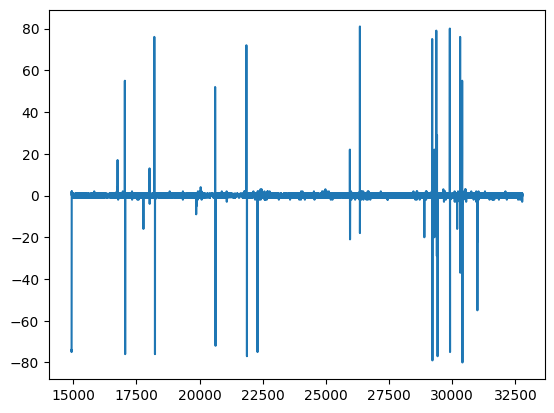

In [9]:
diff = separ_device['Cadence'].dropna() - separ_device['cadence'].dropna() # drop null to make sure the difference is valid
diff.plot()
diff.describe()

In [10]:
# extract those with large differences and see how they look like
separ_device[(separ_device['Cadence'] - separ_device['cadence'] == diff.min()) | (separ_device['Cadence'] - separ_device['cadence'] == diff.max())]

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,...,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp,unknown_87,unknown_88,unknown_90
26346,0.0,81.0,105.0,348.0,12.75,347.0,8.125,NaN,0.0,activities/2797454257.fit.gz,...,0.000,0.0,164.0,504553168.0,-999308953.0,NaN,2019-08-21 03:58:43,0.0,300.0,-5.0
30403,0.0,0.0,0.0,0.0,0.00,0.0,0.000,NaN,80.0,activities/2821406438.fit.gz,...,2.846,0.0,123.0,504460243.0,-999186486.0,NaN,2019-08-28 21:45:02,0.0,300.0,NaN
30404,0.0,0.0,0.0,0.0,0.00,0.0,0.000,NaN,80.0,activities/2821406438.fit.gz,...,2.911,0.0,123.0,504460264.0,-999186922.0,NaN,2019-08-28 21:45:03,0.0,300.0,NaN


I observed the large differences are due to either one cadence column is 0, I want to replace `cadence` with numbers from `Cadence` when `cadence` is 0 or null, to make them consistent.   
Note that I want to do this for our main df, as I will mainly use main df for EDA later.

In [11]:
# Replace 'cadence' with values from 'Cadence' when 'cadence' is 0 or null, and 'Cadence' is not null
df.loc[((df['cadence'] == 0) |
         (df['cadence'].isnull())) & 
         (df['Cadence'].notnull()), 'cadence'] \
= df.loc[((df['cadence'] == 0) 
          | (df['cadence'].isnull())) &
            (df['Cadence'].notnull()), 'Cadence']

In [12]:
# Check rows where 'cadence' was replaced with values from 'Cadence'
updated_rows = df[((df['cadence'] == df['Cadence']) & (df['Cadence'].notnull()))]
updated_rows.describe()

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,unknown_87,unknown_88,unknown_90
count,13646.000000,13647.000000,13646.000000,13647.000000,13646.000000,13647.000000,13647.000000,0.0,13647.000000,13647.000000,13632.000000,13647.00000,13647.0,13647.000000,1.362700e+04,1.362700e+04,0.0,13647.0,13647.000000,10533.000000
mean,1.815111,77.619916,99.295764,323.458782,13.139162,300.647395,6.438485,NaN,77.619916,2406.835230,278.071670,2.45500,0.0,146.665934,5.045438e+08,-9.998828e+08,NaN,0.0,299.325859,-1.122852
std,2.706432,9.856390,14.364848,64.391781,2.007749,49.968804,1.106559,NaN,9.856390,1495.589987,24.438603,0.41813,0.0,13.829763,7.946893e+04,2.042371e+06,NaN,0.0,11.592392,3.072566
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,209.000000,0.00000,0.0,70.000000,5.043676e+08,-1.005693e+09,NaN,0.0,100.000000,-11.000000
25%,1.000000,78.000000,97.000000,308.000000,13.000000,283.000000,6.125000,NaN,78.000000,1133.710000,258.800000,2.32300,0.0,138.000000,5.044774e+08,-9.994056e+08,NaN,0.0,300.000000,-3.000000
50%,1.000000,79.000000,101.000000,326.000000,13.375000,302.000000,6.500000,NaN,79.000000,2252.370000,287.400000,2.47300,0.0,147.000000,5.045567e+08,-9.993499e+08,NaN,0.0,300.000000,-1.000000
75%,2.000000,80.000000,105.000000,340.000000,13.750000,326.000000,6.875000,NaN,80.000000,3658.840000,296.400000,2.66900,0.0,158.000000,5.046165e+08,-9.990037e+08,NaN,0.0,300.000000,1.000000
max,48.000000,87.000000,125.000000,1732.000000,16.875000,460.000000,12.125000,NaN,87.000000,6001.480000,330.000000,3.68600,0.0,183.000000,5.046772e+08,-9.985193e+08,NaN,0.0,300.000000,6.000000


From above, we see that we updated the `cadence` column with the corresponding values from the `Cadence` column for rows where:  
- The value in the column 'cadence' is 0.
- The value in the column 'Cadence' is not null (notnull()).

Although there might be still some differences exist, I accept the result and will move on for now. 

### Time Series for Four Daily Metrics 

#### Hanlde Different Activities

In [13]:
# Check time span for separ_device subset
print(separ_device['timestamp'].min())
print(separ_device['timestamp'].max())

2019-08-17 11:50:36
2019-08-31 19:15:29


In [14]:
# take a look at time spanned for entire dataset
print(df['timestamp'].min())
print(df['timestamp'].max())


2019-07-08 21:04:03
2019-10-03 23:05:05


This dataset consists of data recorded within about 3 months (early July to early October) in 2019, accurated to seconds. And every row has its own `timestamp`, so we can possibly plot a time series. From above investigation about another device's subset `separ_device`, we can make a time series plot of it to see if there are any trends or seasonality in these columns. I will give the period from separ_device some color shade. One worry I have is that becasue of so many entries, plotting to each data point might not work, so I will group by dates, get mean values of these columns and make plots.


In [15]:
# add one column as datetime object and keep only the date part
df = df.assign(date = pd.to_datetime(df['timestamp']).dt.date)
df['date'] = pd.to_datetime(df['date'])
# check if the conversion worked
df['date'].head()

0   2019-07-08
1   2019-07-08
2   2019-07-08
3   2019-07-08
4   2019-07-08
Name: date, dtype: datetime64[ns]

I am interested to see the trend of daily average `cadence`, `distance`, `speed`, and `heart_rate`, tracking daily trends in those metrics helps monitor fitness progress, optimize training, and prevent overtraining or injuries. Let's find out.7

*I will shade time span for separ_device subset ('2019-08-17' to '2019-08-31') in my plots to uncover patterns.*

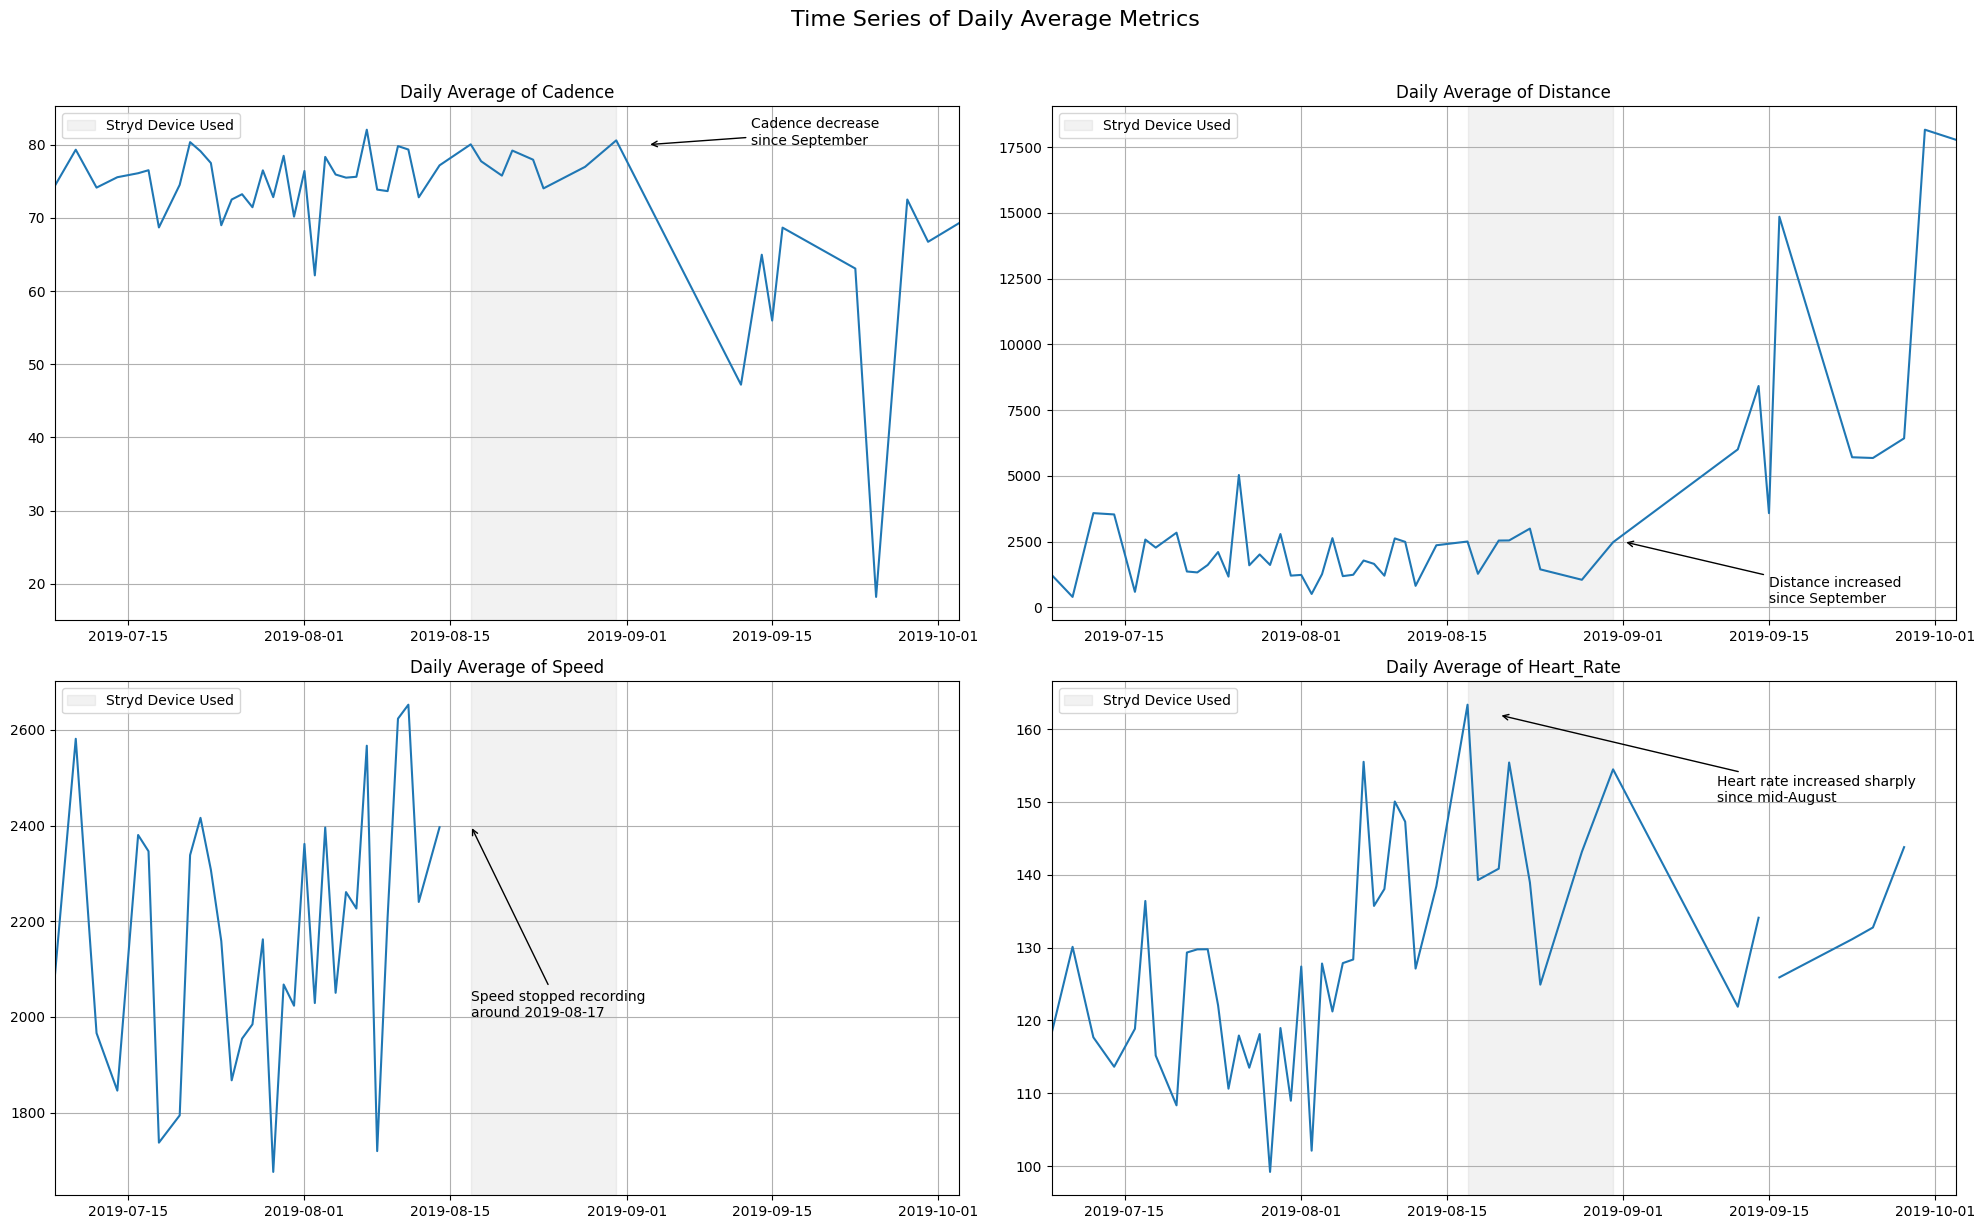

In [16]:
def plot_time_series_with_annotations(metrics, df, highlight_start, highlight_end, axes=None):
    """
    Plots time series of daily average metrics with annotations and shaded areas.

    Parameters:
    - metrics: List of metric column names to plot (e.g., ['cadence', 'distance', 'speed', 'heart_rate']).
    - df: DataFrame containing the data.
    - highlight_start: Start date for the shaded area (datetime object or string).
    - highlight_end: End date for the shaded area (datetime object or string).
    """
    # Calculate daily averages for each metric
    metric_dfs = [df.groupby('date')[col].mean() for col in metrics]

    # Convert string dates to datetime objects if needed
    highlight_start = pd.to_datetime(highlight_start)
    highlight_end = pd.to_datetime(highlight_end)

    # Create a figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))

    for i, dataset in enumerate(metric_dfs):
        ax = axes.flatten()[i]
        ax.plot(dataset)
        ax.set_xlim(metric_dfs[0].index.min(), metric_dfs[0].index.max())
        ax.set_title(f'Daily Average of {metrics[i].title()}')
        ax.axvspan(highlight_start, highlight_end, color='gray', alpha=0.1, label='Stryd Device Used')
        ax.legend(loc='upper left')
        ax.grid(True)

        # Add annotations for specific findings
        if metrics[i] == 'cadence':
            ax.annotate('Cadence decrease\nsince September', 
                        xy=(pd.to_datetime('2019-09-03'), 80),  
                        xytext=(pd.to_datetime('2019-09-13'), 80),  
                        arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
        elif metrics[i] == 'distance':
            ax.annotate('Distance increased\nsince September', 
                        xy=(pd.to_datetime('2019-09-01'), 2500),  
                        xytext=(pd.to_datetime('2019-09-15'), 150),  
                        arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
        elif metrics[i] == 'speed':
            ax.annotate('Speed stopped recording\naround 2019-08-17', 
                        xy=(highlight_start, 2400), 
                        xytext=(highlight_start, 2000), 
                        arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
        elif metrics[i] == 'heart_rate':
            ax.annotate('Heart rate increased sharply\nsince mid-August', 
                        xy=(pd.to_datetime('2019-08-20'), 162), 
                        xytext=(pd.to_datetime('2019-09-10'), 150), 
                        arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

    # Add a title for the entire figure
    fig.suptitle(f"Time Series of Daily Average Metrics", fontsize=16, y=1.02)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

metrics = ['cadence', 'distance', 'speed', 'heart_rate']
highlight_start = '2019-08-17'
highlight_end = '2019-08-31'
plot_time_series_with_annotations(metrics, df, highlight_start, highlight_end)

From above, I can see the data points fluctuate a lot. Especially after around 2019-08-15, I observe:
- Daily avg cadence and daily avg distance tends to have less frequent ups and downs, but after August, the cadence stayed at lower level while distance stayed at a much higher level. This is what made me believe those changes were due to cycling activity started after **September**.
- Daily avg speed fluctuates but stopped recording since **around 2019-08-17**. 
- Daily avg heart rate tends to be higher since **around 2019-08-17**.

There must be difference between cycling/running activities. I will need to differientiate these activities, to simplify, I will make the cut on the day that `speed` stopped reording as this makes sense that Professor tried new activity and new devices (this new device doesn't record speed!) same time.

One question I have is **why there is a gap bewteen mid August and September**?

In [17]:
# find the date that speed stopped recording 
df[(df['speed'].isnull()) & (df['date'] > '2019-08-10')].head(1)

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,...,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp,unknown_87,unknown_88,unknown_90,date
14932,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,74.0,activities/2786247269.fit.gz,...,0.0,101.0,504677069.0,-1.005690e+09,NaN,2019-08-17 11:50:36,0.0,100.0,NaN,2019-08-17


So new device after 2019-08-17, which is exactly when the new device **Stryd** started recording. And I recall that Styrd dataset `separ_device` ended on 2019-08-31 exactly! 

In [18]:
# find the the first day of recording after Stryd stopped recording speed on 2019-08-31 
df[df['date'] > '2019-08-31'].head(2)
# interesting finding, Professor took a two week break from 2019-09-01 to 2019-09-11! 
# That also may be the reason why there are sharp drop/increase on the plot on 2019-09-12.

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,...,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp,unknown_87,unknown_88,unknown_90,date
32779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2863488401.fit.gz,...,0.0,105.0,504112788.0,-998479006.0,NaN,2019-09-12 00:09:40,0.0,300.0,NaN,2019-09-12
32780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2863488401.fit.gz,...,0.0,105.0,504112945.0,-998479717.0,NaN,2019-09-12 00:09:41,0.0,300.0,NaN,2019-09-12


### Summary

Now I can make the summary of this messy dataset:

1. Proffesor started recording his running activity on 2019-07-08 with one device. 
2. Proffesor still ran, tut hen tried a new device  during 2019-08-17 - 2019-08-31, some new metrics like `Air Power`, `Cadence`, `Form Power`, `Ground Time`, `Leg Spring Stiffness`, `Power`, and `Vertical Oscillation` were recorded. For this period, `cadence` was also recorded but many numbers were missing or invalid (as 0), so I replaced those with numbers from `Cadence`, and we will use data from `cadence` for consistency.
3. After 2019-08-31, as well as a short break, proffesor started to cycling with another device on 2019-09-12.

Now I can officially make two subset for visual analysis!

In [19]:
# first subset is running activity
run_df = df[df['timestamp'] <= '2019-08-31']
# second subset is cyclying activity
cycling_df = df[df['timestamp'] >= '2019-09-12']

In [20]:
# verify if cadence, distance, heart rates are different for two activities
display(run_df.describe())
display(cycling_df.describe())

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,distance,...,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,unknown_87,unknown_88,unknown_90,date
count,16058.000000,16063.000000,16058.000000,16063.000000,16058.000000,16063.000000,16063.000000,14905.000000,30995.000000,30995.000000,...,30991.000000,30995.000000,30995.000000,3.080900e+04,3.080900e+04,14928.000000,30995.0,30995.000000,17194.000000,30995
mean,1.440902,77.414929,98.882488,328.504762,13.133462,296.451784,6.420275,3846.184368,76.133183,2393.962429,...,2.251930,0.091934,133.979965,5.045001e+08,-9.995218e+08,2067.483856,0.0,298.244878,-1.257939,2019-08-08 08:03:10.482335744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3555.000000,0.000000,0.000000,...,0.000000,0.000000,56.000000,5.041973e+08,-1.005696e+09,0.000000,0.0,100.000000,-13.000000,2019-07-08 00:00:00
25%,0.000000,78.000000,97.000000,312.000000,13.000000,281.000000,6.125000,3768.000000,76.000000,976.260000,...,2.015000,0.000000,119.000000,5.044360e+08,-9.993783e+08,1782.000000,0.0,300.000000,-3.000000,2019-07-26 00:00:00
50%,1.000000,79.000000,101.000000,328.000000,13.375000,299.000000,6.500000,3829.000000,78.000000,2060.060000,...,2.333000,0.000000,135.000000,5.044922e+08,-9.992090e+08,2071.000000,0.0,300.000000,-1.000000,2019-08-17 00:00:00
75%,2.000000,80.000000,105.000000,342.000000,13.750000,319.000000,6.875000,3912.000000,80.000000,3572.870000,...,2.538000,0.000000,149.000000,5.045874e+08,-9.989793e+08,2370.000000,0.0,300.000000,0.000000,2019-08-21 00:00:00
max,42.000000,87.000000,125.000000,1732.000000,16.875000,462.000000,12.500000,5043.000000,117.000000,10084.150000,...,7.744000,0.500000,183.000000,5.089272e+08,-9.921938e+08,7744.000000,0.0,300.000000,6.000000,2019-08-28 00:00:00
std,1.957708,9.585474,14.282833,73.752761,2.114882,47.768504,1.168239,134.262498,11.285892,1758.973518,...,0.494713,0.193692,19.187459,9.614719e+04,1.554793e+06,527.173476,0.0,18.653555,2.832835,NaN


,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,distance,...,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,unknown_87,unknown_88,unknown_90,date
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7848.000000,7870.000000,...,7864.000000,7848.0,5576.000000,7.864000e+03,7.864000e+03,0.0,7848.0,5576.0,0.0,7870
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.915392,11171.755139,...,6.179906,0.0,132.225610,5.046849e+08,-9.995310e+08,NaN,0.0,300.0,NaN,2019-09-22 23:12:36.594663424
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.0,76.000000,5.039868e+08,-1.000876e+09,NaN,0.0,300.0,NaN,2019-09-12 00:00:00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.000000,3302.890000,...,4.591000,0.0,126.000000,5.044819e+08,-9.998378e+08,NaN,0.0,300.0,NaN,2019-09-15 00:00:00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.000000,8104.790000,...,6.364000,0.0,136.000000,5.046831e+08,-9.993737e+08,NaN,0.0,300.0,NaN,2019-09-25 00:00:00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.000000,16204.565000,...,7.838000,0.0,142.000000,5.049611e+08,-9.991738e+08,NaN,0.0,300.0,NaN,2019-09-30 00:00:00
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.000000,39007.120000,...,15.349000,0.0,160.000000,5.053428e+08,-9.984683e+08,NaN,0.0,300.0,NaN,2019-10-03 00:00:00
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.892090,10035.351100,...,2.560123,0.0,13.592851,2.871009e+05,5.199882e+05,NaN,0.0,0.0,NaN,NaN


## Visial Analysis

For this section, I am going to make visual analysis for two activities to get gain insights for Running vs. Cycling:

1. Density Curves 
2. Heatmaps
3. Advanced: Map to Track Running and Cycling Routes

### Density Curves

- Compare the cadence distributions for running and cycling to see how they differ.
- Use a histogram combined with KDE (Kernel Density Estimate) plot.

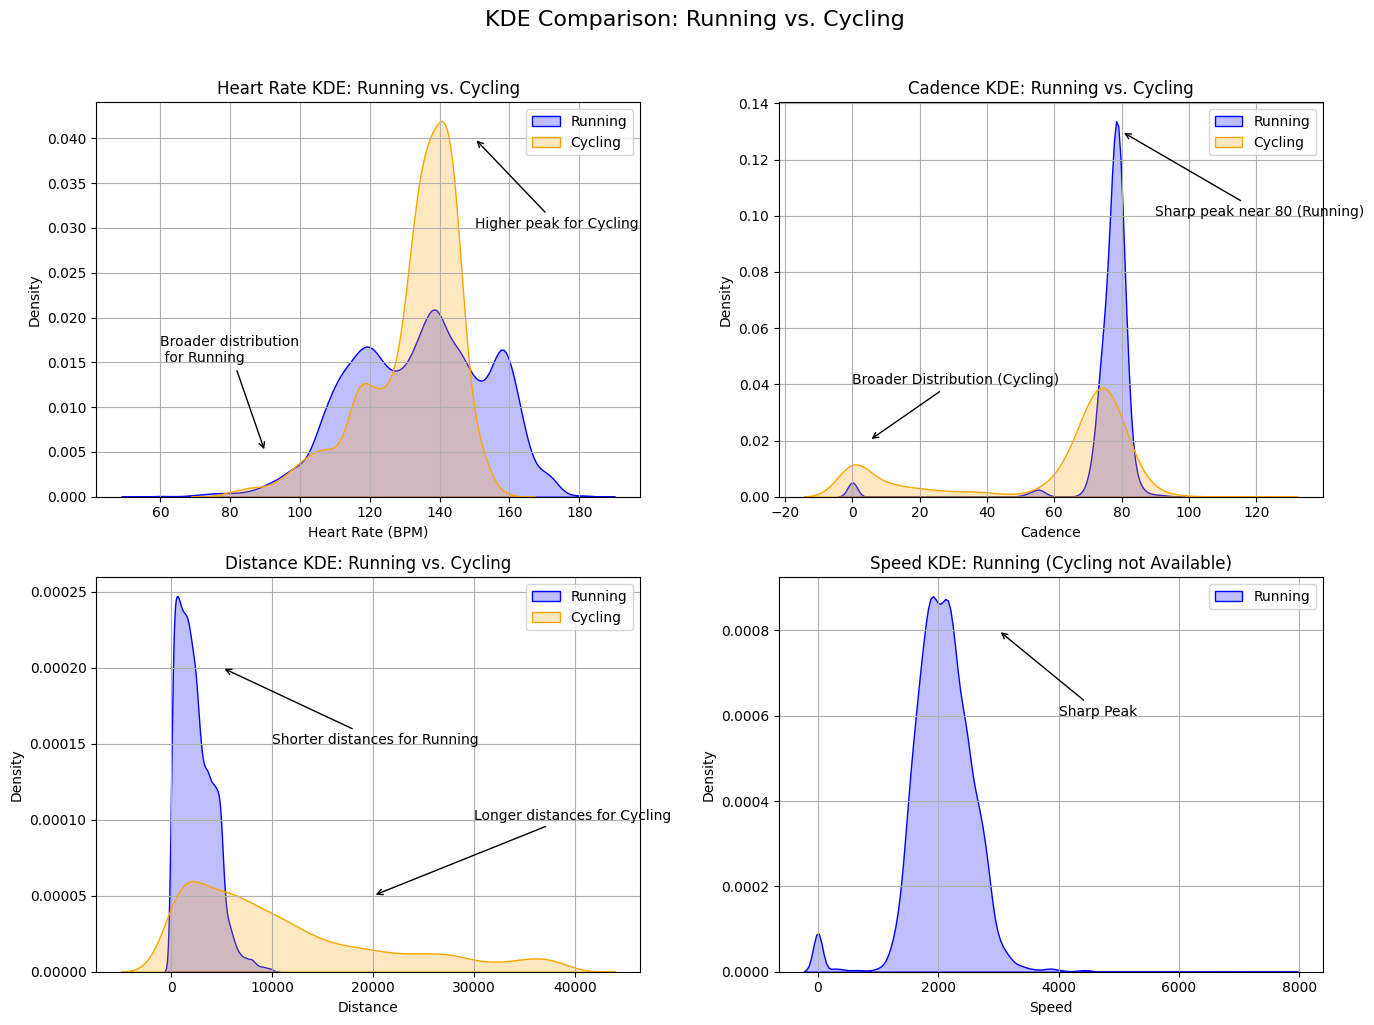

In [21]:
def plot_kde_comparison(run_df, cycling_df, axes=None):
    """
    Plots KDE comparisons for heart rate, cadence, distance, and speed between running and cycling.

    Parameters:
    - run_df: DataFrame containing running data.
    - cycling_df: DataFrame containing cycling data.
    """
    # Create a figure with 4 subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Plot KDE for heart_rate
    sns.kdeplot(run_df['heart_rate'], label='Running', color='blue', fill=True, ax=axes[0, 0])
    sns.kdeplot(cycling_df['heart_rate'], label='Cycling', color='orange', fill=True, ax=axes[0, 0])
    axes[0, 0].set_title('Heart Rate KDE: Running vs. Cycling')
    axes[0, 0].set_xlabel('Heart Rate (BPM)')
    axes[0, 0].set_ylabel('Density')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # Add annotations for heart rate
    axes[0, 0].annotate('Higher peak for Cycling', xy=(150, 0.04), xytext=(150, 0.03),
                        arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
    axes[0, 0].annotate('Broader distribution\n for Running', xy=(90, 0.005), xytext=(60, 0.015),
                        arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

    # Plot KDE for cadence
    sns.kdeplot(run_df['cadence'], label='Running', color='blue', fill=True, ax=axes[0, 1])
    sns.kdeplot(cycling_df['cadence'], label='Cycling', color='orange', fill=True, ax=axes[0, 1])
    axes[0, 1].set_title('Cadence KDE: Running vs. Cycling')
    axes[0, 1].set_xlabel('Cadence')
    axes[0, 1].set_ylabel('Density')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    # Add annotations for cadence
    axes[0, 1].annotate('Sharp peak near 80 (Running)', xy=(80, 0.13), xytext=(90, 0.1),
                        arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
    axes[0, 1].annotate('Broader Distribution (Cycling)', xy=(5, 0.02), xytext=(0, 0.04),
                        arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

    # Plot KDE for distance
    sns.kdeplot(run_df['distance'], label='Running', color='blue', fill=True, ax=axes[1, 0])
    sns.kdeplot(cycling_df['distance'], label='Cycling', color='orange', fill=True, ax=axes[1, 0])
    axes[1, 0].set_title('Distance KDE: Running vs. Cycling')
    axes[1, 0].set_xlabel('Distance')
    axes[1, 0].set_ylabel('Density')
    axes[1, 0].legend()
    axes[1, 0].grid(True)

    # Add annotations for distance
    axes[1, 0].annotate('Shorter distances for Running', xy=(5000, 0.0002), xytext=(10000, 0.00015),
                        arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
    axes[1, 0].annotate('Longer distances for Cycling', xy=(20000, 0.00005), xytext=(30000, 0.0001),
                        arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

    # Plot KDE for speed
    sns.kdeplot(run_df['speed'], label='Running', color='blue', fill=True, ax=axes[1, 1])
    axes[1, 1].set_title('Speed KDE: Running (Cycling not Available)')
    axes[1, 1].set_xlabel('Speed')
    axes[1, 1].set_ylabel('Density')
    axes[1, 1].legend()
    axes[1, 1].grid(True)

    # Add annotations for speed
    axes[1, 1].annotate('Sharp Peak', xy=(3000, 0.0008), xytext=(4000, 0.0006),
                        arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

    plt.suptitle('KDE Comparison: Running vs. Cycling', fontsize=16, y=1.02)
    
    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

plot_kde_comparison(run_df, cycling_df)

#### **Key Findings**
1. **Heart Rate**:
   - **Cycling**: Shows a higher peak around 140 BPM, indicating a more consistent and higher heart rate during cycling.
   - **Running**: Displays a broader distribution, with heart rates extending to higher values, reflecting more variability.

2. **Cadence**:
   - **Running**: A sharp, narrow peak around 80 steps per minute, indicating consistent cadence. Very small peak near 0 RPM.
   - **Cycling**: A broader distribution with a secondary peak near 0 RPM, likely representing periods of inactivity or coasting.

3. **Distance**:
   - **Running**: Distances are generally shorter, with most values concentrated below 10,000 meters.
   - **Cycling**: Distances are generally longer, with a significant portion extending beyond 20,000 meters, even sometimes over 30,000 meters!

4. **Speed**:
   - **Running**: Lower speeds, with a peak around 2,000 meters per hour, consistent with the slower pace of running. Also there is a small peak near 0, indicating walking, slowing down, wating, etc.

**Overall Insights**   
Running and cycling tell distinct patterns in key metrics. Running demonstrates a steady and consistent effort, with tight patterns in cadence, distance and speed, reflecting its repetitive and controlled nature. On the other hand, cycling reveals more variability, likely due to coasting, changes in terrain, or periods of rest. The much longer distances in cycling highlight its efficiency as an activity, while the broader heart rate distribution in running suggests greater cardiovascular range. These differences emphasize how each activity engages the body differently, offering unique benefits and challenges.

### Heatmaps

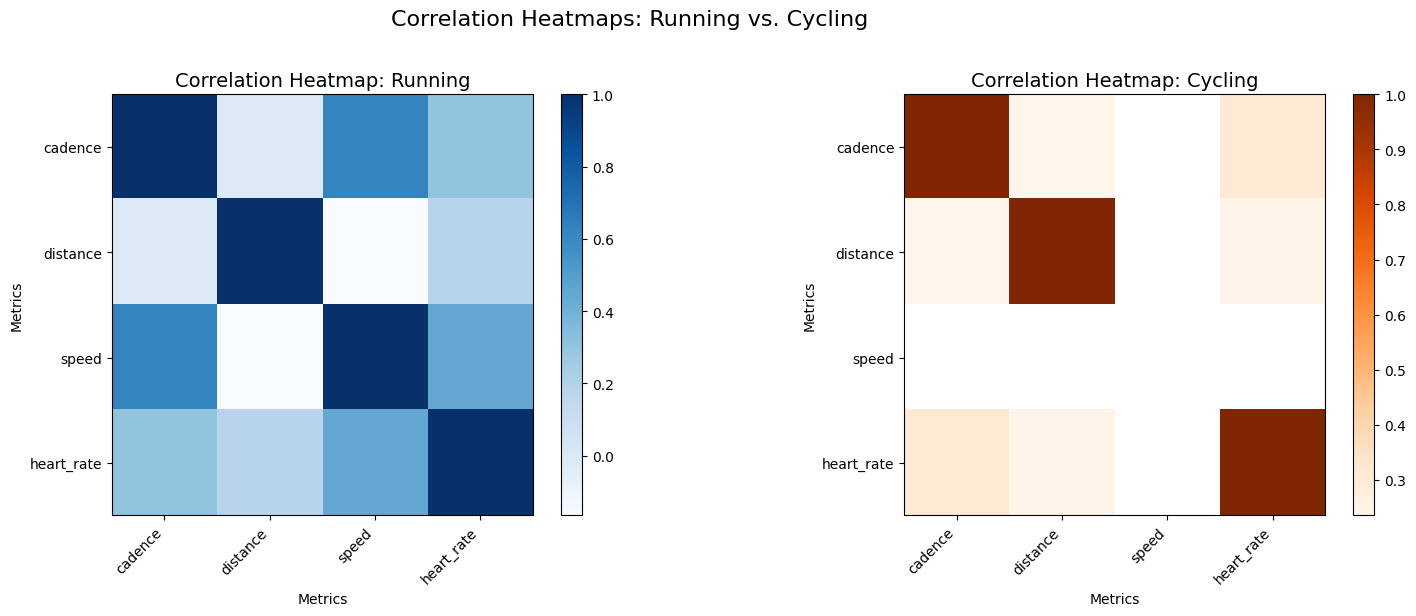

In [22]:
def plot_correlation_heatmaps(run_corr, cycling_corr, axes=None):
    """
    Plots correlation heatmaps for running and cycling data.

    Parameters:
    - run_corr: DataFrame containing the correlation matrix for running data.
    - cycling_corr: DataFrame containing the correlation matrix for cycling data.
    """
    # Create a figure with 2 subplots for heatmaps
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Heatmap for running
    im1 = axes[0].imshow(run_corr, cmap="Blues")
    axes[0].set_title("Correlation Heatmap: Running", fontsize=14)
    axes[0].set_xticks(range(len(run_corr.columns)))
    axes[0].set_yticks(range(len(run_corr.index)))
    axes[0].set_xticklabels(run_corr.columns, rotation=45, ha="right")
    axes[0].set_yticklabels(run_corr.index)
    axes[0].set_xlabel("Metrics")
    axes[0].set_ylabel("Metrics")
    cbar1 = plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

    # Heatmap for cycling
    im2 = axes[1].imshow(cycling_corr, cmap="Oranges")
    axes[1].set_title("Correlation Heatmap: Cycling", fontsize=14)
    axes[1].set_xticks(range(len(cycling_corr.columns)))
    axes[1].set_yticks(range(len(cycling_corr.index)))
    axes[1].set_xticklabels(cycling_corr.columns, rotation=45, ha="right")
    axes[1].set_yticklabels(cycling_corr.index)
    axes[1].set_xlabel("Metrics")
    axes[1].set_ylabel("Metrics")
    cbar2 = plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

    plt.suptitle("Correlation Heatmaps: Running vs. Cycling", fontsize=16, y=1.02)
    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

run_corr = run_df[['cadence', 'distance', 'speed', 'heart_rate']].corr()
cycling_corr = cycling_df[['cadence', 'distance', 'speed', 'heart_rate']].corr()
plot_correlation_heatmaps(run_corr, cycling_corr)

#### Key Findings

Speed does not exisit in cyclying subset, so it shows white.

**1. Running Correlation Heatmap**

- **Overall**: Metrics are tightly correlated, reflecting consistent effort and higher cardiovascular demand.
- **Cadence & Speed**: Strong positive correlation (~0.8), indicating higher cadence leads to higher speed.
- **Heart Rate**: Moderately correlated with both speed (~0.6) and cadence (~0.5), reflecting consistent effort.

**2. Cycling Correlation Heatmap**
- **Overall**: Weaker correlation for most metrics, reflecting variability in cycling effort due to coasting, terrain changes, or rest periods.
- **heart rate & Cadence**: a slightly stronger correlation (~0.3), likely due to periods of consistent pedaling effort.

**Overall Insights**  
The differences between running and cycling highlight how each activity uniquely engages the body. Running demands consistent effort, with tightly linked metrics reflecting its repetitive and controlled nature. In contrast, cycling introduces variability, caused by different terrains, coasting, and possibly sightseeing as it offers longer distance to discover new destinations, offering a more dynamic experience. Interestingly, even with this variability, cycling still maintains a connection between heart rate and cadence during active pedaling, showcasing the balance between efficiency and effort. These contrasts not only reveal the distinct physical demands of each activity but also underscore their uniques benefits for fitness and endurance training.


### Dashboard of All the Plots Made

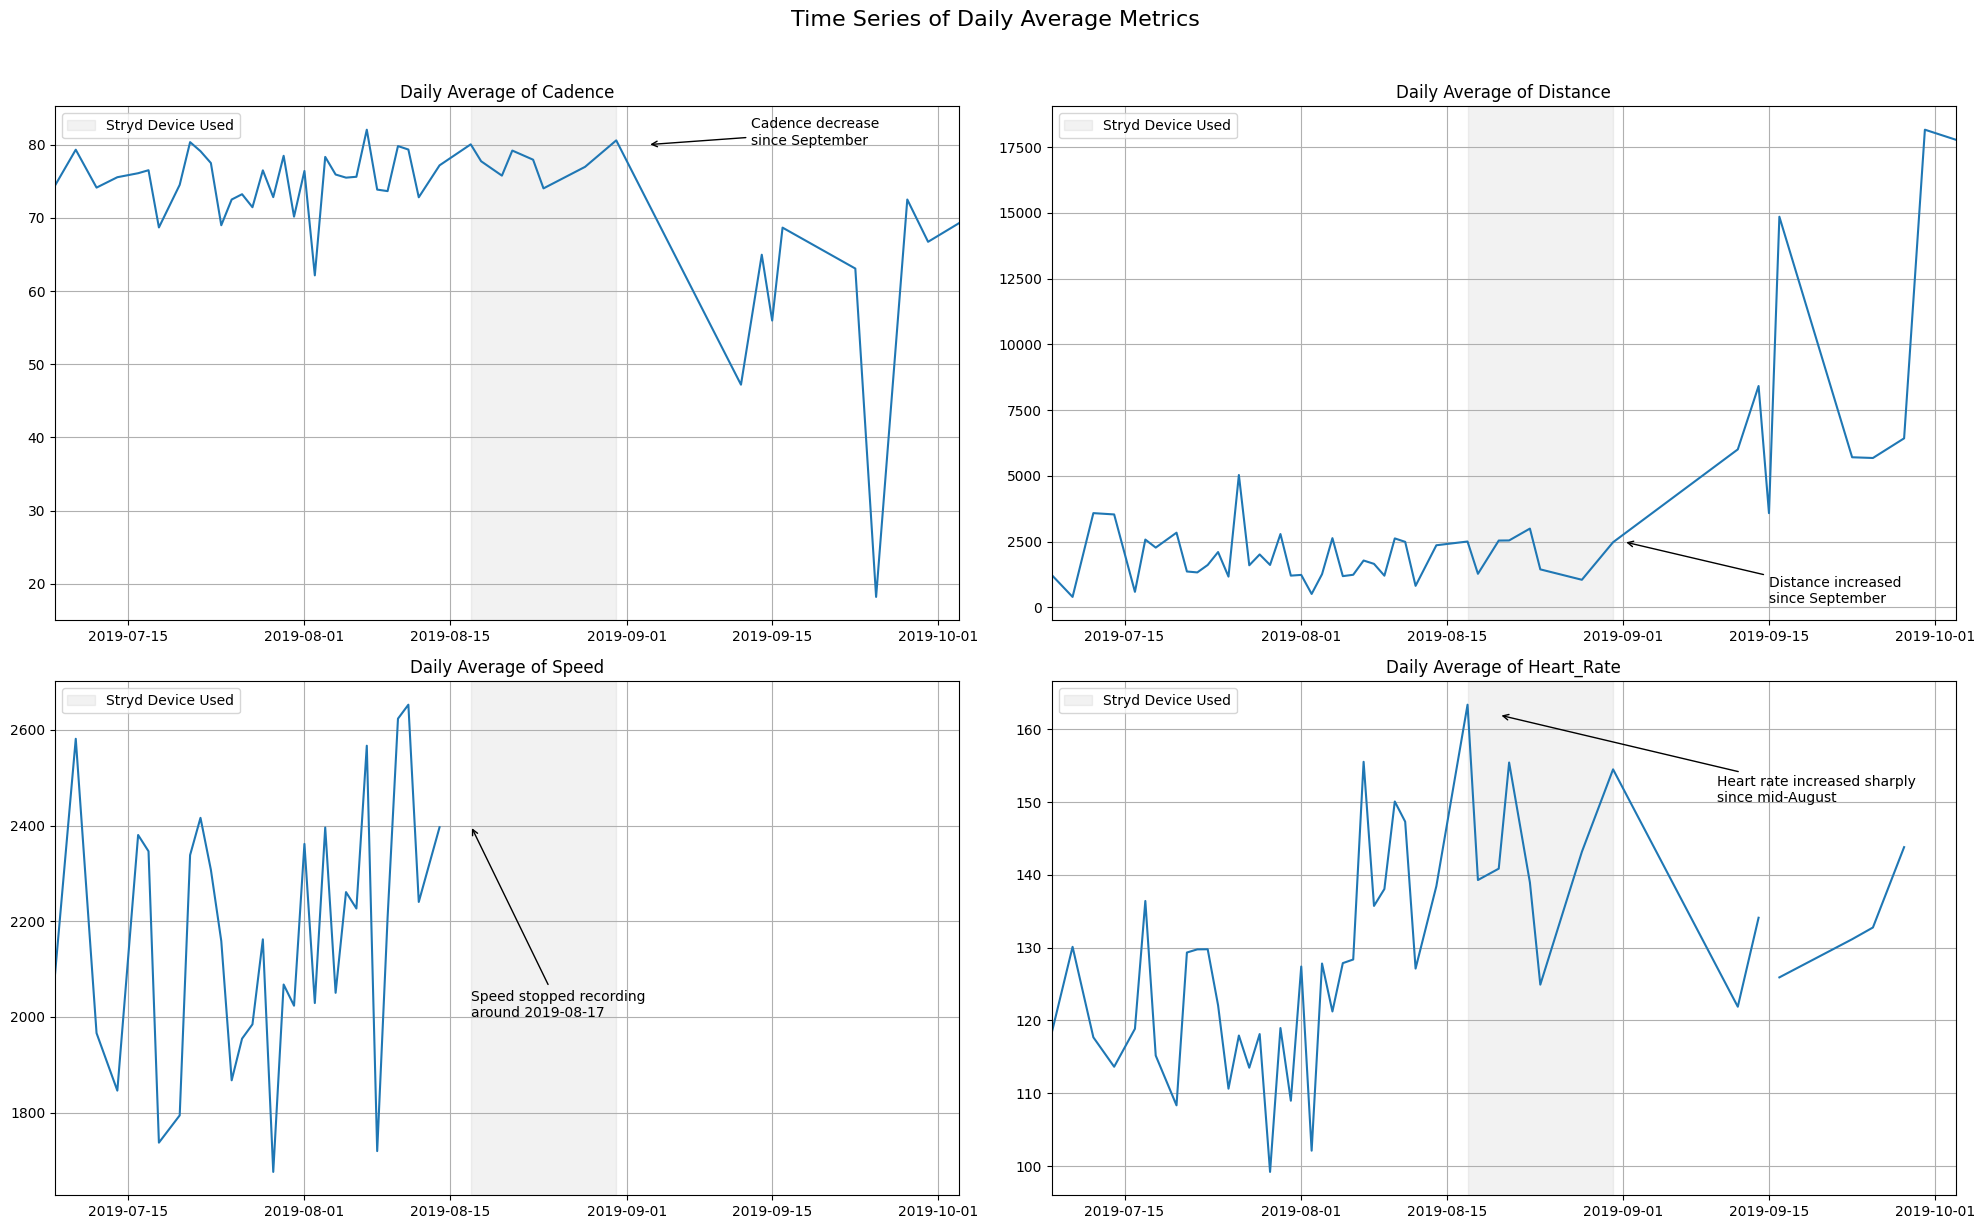

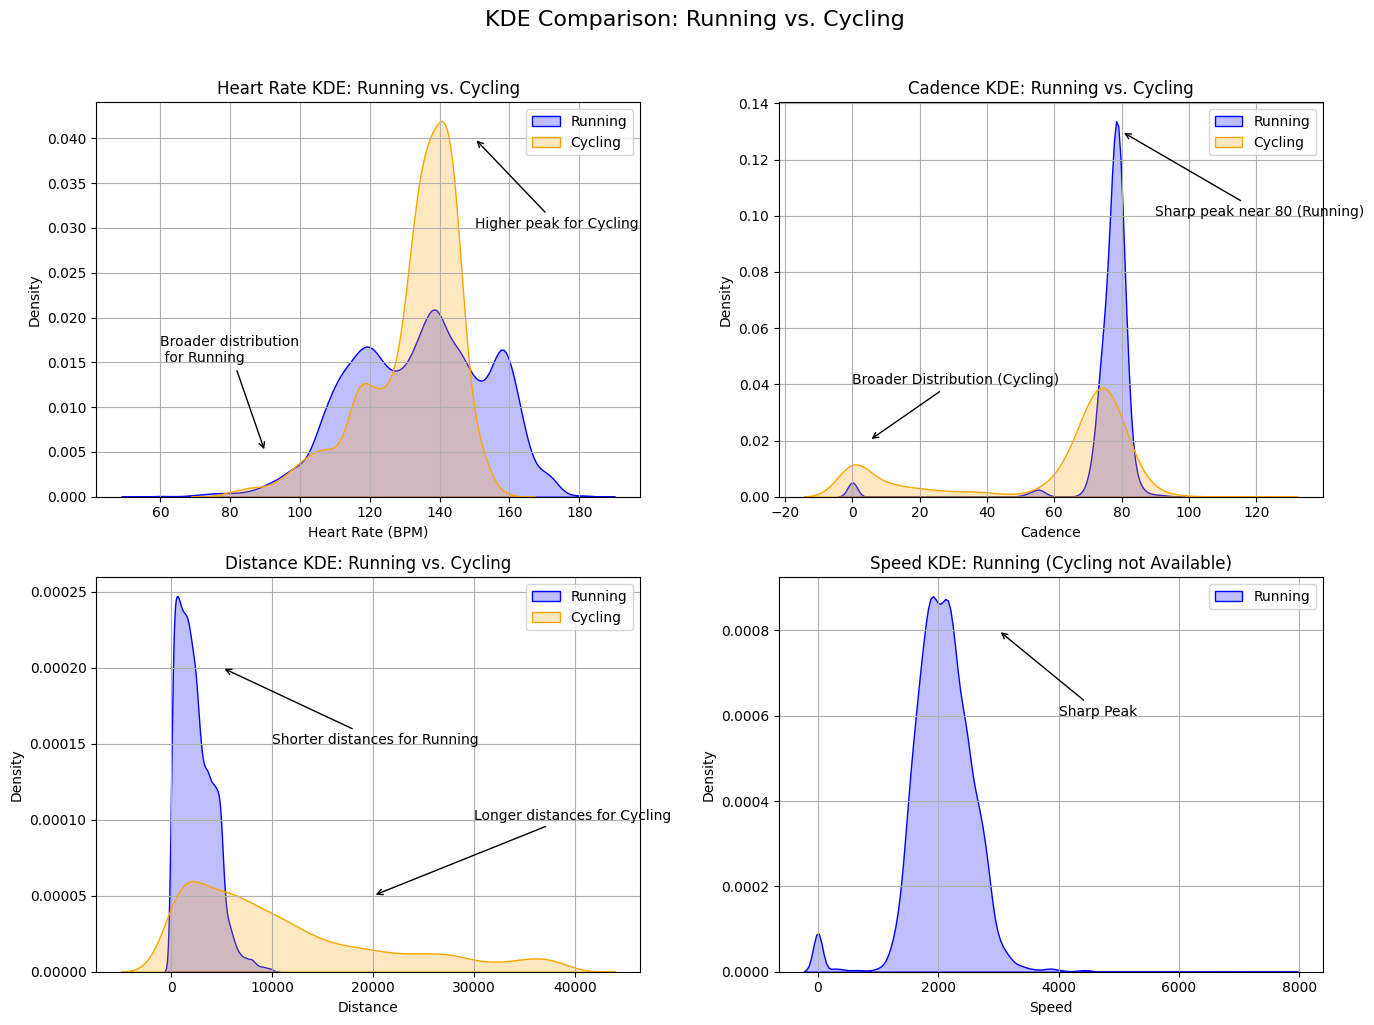

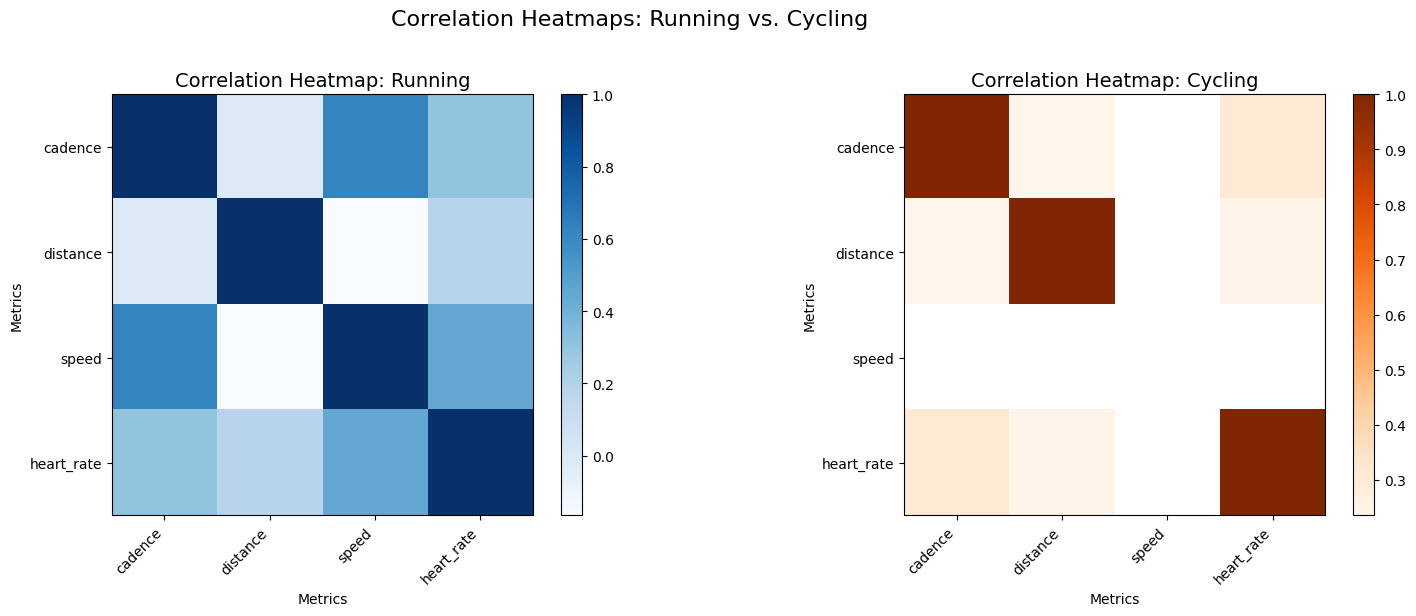

<Figure size 640x480 with 0 Axes>

In [23]:
# Time Series Plots
plot_time_series_with_annotations(['cadence', 'distance', 'speed', 'heart_rate'], df, '2019-08-17', '2019-08-31')

# KDE Plots
plot_kde_comparison(run_df, cycling_df)

# Correlation Heatmaps
plot_correlation_heatmaps(run_corr, cycling_corr)

plt.tight_layout()
plt.show()

### Optional: Interactive Map to Track Running and Cycling Routes

To map and track running and cycling routes using `position_lat`, `position_long`, and `date`, we can use the folium library to create an interactive map. **I provided a screenshot below for your reference, so you don't need to run the code which takes few minutes.**

<img src="map_result.png" alt="Map Visualization" width="600"/>

**To explore the interactive map, uncomment and run the code below.**

In [24]:
# # First, drop NA values and convert microdegrees (much faster to do this first)
# run_df = run_df.dropna(subset=['position_lat', 'position_long']).copy()
# cycling_df = cycling_df.dropna(subset=['position_lat', 'position_long']).copy()

# # Vectorized conversion from microdegrees (if needed)
# for df in [run_df, cycling_df]:
#     if df['position_lat'].max() > 90:
#         df['position_lat'] = df['position_lat'] / 1e7
#         df['position_long'] = df['position_long'] / 1e7

# # MUCH faster DMS conversion without inspect.stack()
# def convert_to_dms_vectorized(series, is_latitude=True):
#     degrees = series.astype(int)
#     remainder = (series - degrees).abs()
#     minutes = (remainder * 60).astype(int)
#     seconds = ((remainder * 60 - minutes) * 60).round(2)
    
#     directions = np.where(series >= 0, 
#                          'N' if is_latitude else 'E', 
#                          'S' if is_latitude else 'W')
    
#     return (degrees.abs().astype(str) + '°' + 
#             minutes.astype(str) + "'" + 
#             seconds.astype(str) + '"' + 
#             directions)

# # Apply the vectorized conversion

# run_df['position_lat_dms'] = convert_to_dms_vectorized(run_df['position_lat'], True)
# run_df['position_long_dms'] = convert_to_dms_vectorized(run_df['position_long'], False)
# cycling_df['position_lat_dms'] = convert_to_dms_vectorized(cycling_df['position_lat'], True)
# cycling_df['position_long_dms'] = convert_to_dms_vectorized(cycling_df['position_long'], False)

# # Check the random rows of the converted columns
# run_df[['position_lat', 'position_lat_dms']].sample(10)

In [25]:
# # This might take a while to run, please be patient :)

# # For mapping - use vectorized operations instead of iterrows
# def add_route_to_map(df, color, map_obj):
#     coords = df[['position_lat', 'position_long']].values
#     dms_info = df[['position_lat_dms', 'position_long_dms']].values
    
#     for (lat, lon), (lat_dms, lon_dms) in zip(coords, dms_info):
#         folium.CircleMarker(
#             location=[lat, lon],
#             radius=2,
#             color=color,
#             popup=f"Lat: {lat_dms}<br>Lon: {lon_dms}"
#         ).add_to(map_obj)

# # Create map
# map_center = [
#     pd.concat([run_df['position_lat'], cycling_df['position_lat']]).mean(),
#     pd.concat([run_df['position_long'], cycling_df['position_long']]).mean()
# ]

# activity_map = folium.Map(location=map_center, zoom_start=12)

# # Add routes (this will still take some time for 40K points)
# add_route_to_map(run_df, 'blue', activity_map)
# add_route_to_map(cycling_df, 'orange', activity_map)

# # Add legend to the map
# legend_html = '''
# <div style="
#     position: fixed; 
#     bottom: 50px; 
#     left: 50px; 
#     width: 180px;
#     z-index: 1000;
#     background-color: white;
#     padding: 10px;
#     border-radius: 5px;
#     box-shadow: 0 0 10px rgba(0,0,0,0.2);
#     font-family: Arial, sans-serif;
# ">
#     <h4 style="margin-top:0; margin-bottom:10px; border-bottom:1px solid #eee; padding-bottom:5px;">Activity Legend</h4>
#     <p style="margin:5px 0;"><i class="fa fa-circle" style="color:#1f77b4; margin-right:5px;"></i> Running Routes</p>
#     <p style="margin:5px 0;"><i class="fa fa-circle" style="color:#ff7f0e; margin-right:5px;"></i> Cycling Routes</p>
# </div>
# '''


# #Display the map in the notebook (uncomment below to reder it in Jupyter Notebook)
# activity_map.get_root().html.add_child(folium.Element(legend_html))
# display(activity_map)

# # Uncomment below if you wish to save a copy of the map!
# #activity_map.save('optimized_activity_map.html')

#### Key Insights  

**A Journey Through Connection and Community**  

As we trace the vibrant paths of Professor's running and cycling routes in Manitoba, Canada, a beautiful story emerges - one of movement, exploration, and deep connection to the land. His footsteps and tire tracks weave through places like **Dittbineya-zilbiling / Rolling River**, honoring the history and spirit of this land, while the stretches along areas near **Jackfish Lake** speak to his love for open roads, beautiful nature, and boundless horizons. The recurring presence of **Rolling River** and the nearby community of **Erickson** hints at familiar rhythms - a favorite loop, a cherished view, or perhaps the warmth of returning to places that feel like home. He even explored further area near **Shoal Lake** by foot during this perfect summer time!

As a person who lived in Saskatchewan, Canada for 5 years, I know this isn't just a map of routes. It's a living testament to how Professor moves through the stunning prairie of Canada! With endless curiosity, he's developed a profound connection to the mother of land and the trails that shape his journey. Every mile tells a story of perseverance, discovery, and the quiet joy of belonging to a place. Go blue! 🏃‍♂️🚴‍♀️💙